공공 데이터 포탈에서 다운받은 '한국도로공사_대구경북권 톨게이트 진출입 일교통량'을 검색.
상세 정보에서 한국도로 공사링크를 제공.
링크를 따라간 후  집계주기 1일, 분기 : 2023년 4분기 파일을 다운로드 


1. 집계일자, 영업소명, 입출구명, TCS하이패스명, 총교통량을 제외한 나머지 컬럼 삭제

2. 2023년 10월의 각 영업소별 총 교통량을 막대 그래프로 출력

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 지정
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./input/TCS_B3_04_03_238959.csv', encoding='cp949')
df.head(100)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2023-10-01,203,가산,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,1045,2,9,2,2,4,1064
1,2023-10-01,203,가산,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,12150,50,59,44,32,355,12690
2,2023-10-01,203,가산,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,889,2,7,5,4,127,1034
3,2023-10-01,203,가산,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,8670,56,31,21,18,250,9046
4,2023-10-01,274,가조,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,292,0,0,1,0,3,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-10-01,748,동청송영양,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,2137,2,3,0,3,41,2186
96,2023-10-01,778,둔산,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,91,0,1,1,0,0,93
97,2023-10-01,778,둔산,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,872,6,6,3,2,29,918
98,2023-10-01,778,둔산,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,114,1,6,2,0,15,138


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   집계일자          21528 non-null  object
 1   영업소코드         21528 non-null  int64 
 2   영업소명          21528 non-null  object
 3   입출구구분코드       21528 non-null  int64 
 4   입출구명          21528 non-null  object
 5   TCS하이패스구분코드   21528 non-null  int64 
 6   TCS하이패스명      21528 non-null  object
 7   고속도로운영기관구분코드  21528 non-null  int64 
 8   고속도로운영기관명     21528 non-null  object
 9   영업형태구분코드      21528 non-null  int64 
 10  영업형태명         21528 non-null  object
 11  1종교통량         21528 non-null  int64 
 12  2종교통량         21528 non-null  int64 
 13  3종교통량         21528 non-null  int64 
 14  4종교통량         21528 non-null  int64 
 15  5종교통량         21528 non-null  int64 
 16  6종교통량         21528 non-null  int64 
 17  총교통량          21528 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 3.0+ MB


In [4]:
df.columns

Index(['집계일자', '영업소코드', '영업소명', '입출구구분코드', '입출구명', 'TCS하이패스구분코드', 'TCS하이패스명',
       '고속도로운영기관구분코드', '고속도로운영기관명', '영업형태구분코드', '영업형태명', '1종교통량', '2종교통량',
       '3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'],
      dtype='object')

In [5]:
# df1 = df.drop(['영업소코드', '입출구구분코드', 'TCS하이패스구분코드',
#                '고속도로운영기관구분코드', '고속도로운영기관명', '영업형태구분코드', '영업형태명', '1종교통량', '2종교통량',
#                '3종교통량', '4종교통량', '5종교통량', '6종교통량'], axis=1)
df1 = df[['집계일자', '영업소명', '입출구명', 'TCS하이패스명', '총교통량']]
df1
#집계일자, 영업소명, 입출구명, TCS하이패스명, 총교통량

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
0,2023-10-01,가산,입구,TCS,1064
1,2023-10-01,가산,입구,hi-pass,12690
2,2023-10-01,가산,출구,TCS,1034
3,2023-10-01,가산,출구,hi-pass,9046
4,2023-10-01,가조,입구,TCS,296
...,...,...,...,...,...
21523,2023-12-31,해인사,출구,hi-pass,2518
21524,2023-12-31,화원옥포,입구,TCS,812
21525,2023-12-31,화원옥포,입구,hi-pass,8943
21526,2023-12-31,화원옥포,출구,TCS,812


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   집계일자      21528 non-null  object
 1   영업소명      21528 non-null  object
 2   입출구명      21528 non-null  object
 3   TCS하이패스명  21528 non-null  object
 4   총교통량      21528 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 841.1+ KB


In [7]:
# 2. 2023년 10월의 각 영업소별 총 교통량을 막대 그래프로 출력
# df2 = df1.groupby('영업소명', as_index=False).agg(n=('영업소명', 'count'))
# df2

df2 = df1[df1['집계일자'] == '2023-10-01']
df2.tail()
# start='2023.10.01, end='2023.10.31

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
229,2023-10-01,해인사,출구,hi-pass,4240
230,2023-10-01,화원옥포,입구,TCS,1246
231,2023-10-01,화원옥포,입구,hi-pass,12197
232,2023-10-01,화원옥포,출구,TCS,1201
233,2023-10-01,화원옥포,출구,hi-pass,11591


In [8]:
df3 = df2.groupby('영업소명', as_index=False).agg(n=('총교통량', 'sum'))
df3.tail()

,영업소명,n
55,포항,57450
56,풍기,21851
57,함양,9126
58,해인사,9732
59,화원옥포,26235


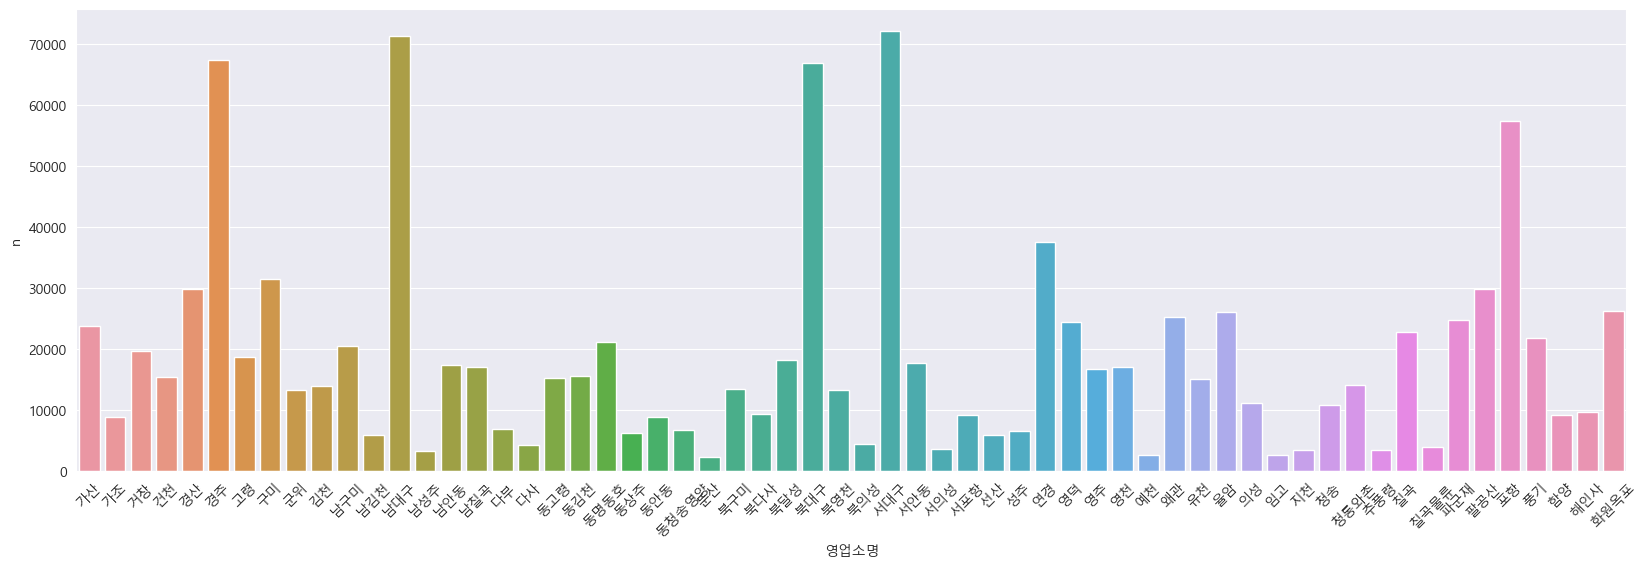

In [11]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.barplot(data=df3, x='영업소명', y='n')
plt.show()

In [15]:
# 먼저 '집계일자' 열이 날짜 형식인지 확인하고, 문자열이라면 날짜 형식으로 변환합니다.
# df1['집계일자'] = pd.to_datetime(df1['집계일자'])

# 2023년 10월 1일부터 10월 31일까지의 데이터를 필터링
df4 = df1[(df1['집계일자'] >= '2023-10-01') & (df1['집계일자'] <= '2023-10-31')]

# 결과 확인
df4


,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
0,2023-10-01,가산,입구,TCS,1064
1,2023-10-01,가산,입구,hi-pass,12690
2,2023-10-01,가산,출구,TCS,1034
3,2023-10-01,가산,출구,hi-pass,9046
4,2023-10-01,가조,입구,TCS,296
...,...,...,...,...,...
7249,2023-10-31,해인사,출구,hi-pass,2127
7250,2023-10-31,화원옥포,입구,TCS,1608
7251,2023-10-31,화원옥포,입구,hi-pass,13906
7252,2023-10-31,화원옥포,출구,TCS,1574
